In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 20 * x * pow(1-x, 3)

def g(x):
    return 1

def linGen(a, b, m, seed, N):
	ui = []
	x = seed
	for _ in range(N):
		x = (a*x + b) % m
		u = x/m
		ui.append(u)
	return ui

a = 1234567
b = 2312
m = 2**32
seed = 234234

rng = linGen(a,b,m,seed,1000000)

In [3]:
a = 1234567
b = 2312
m = 2**32
seed = 234234

rng = linGen(a,b,m,seed,1000000)

# Part (I)

In [4]:
def acceptance_rejection(N,c):
    samples = []
    iterations = []
    k = 0
    totalCount=0
    for i in range(N):
        currCount=0
        while True:
            x = rng[k]
            y = rng[k+1]
            k+=2
            totalCount+=1
            currCount+=1
            if y <= f(x) / (c * g(x)):
                samples.append(x)
                iterations.append(currCount)
                break

    return samples, totalCount/N, iterations


#### c = 135/64 (max of f(x))

In [5]:
# c = 135/64
xi = np.arange(0,1,0.001)
c = -1
for i in xi:
    c = max(c, f(i))

samples, avgIter, iterations = acceptance_rejection(10000,c)

## (a)

In [6]:
print("Average number of iterations required =", avgIter)

Average number of iterations required = 2.1053


## (b)

In [7]:
sample_mean = np.mean(samples)

expected_mean = 0
v = np.arange(0,1,0.0001)
for i in v:
    expected_mean+=i*f(i)/10000
    
print("Sample mean =", sample_mean, "Expected mean =", expected_mean)

Sample mean = 0.335459325709939 Expected mean = 0.3333333333333325


## (c)

In [8]:
count_range = 0
for i in samples:
    if(i>=0.25 and i<=0.75):
        count_range+=1
approx_prob = count_range / 10000
exxact_prob = 0.6171875

print("Approx prob =", approx_prob)
print("Exact prob from PDF =", exxact_prob)

Approx prob = 0.6226
Exact prob from PDF = 0.6171875


## (d)

In [9]:
avg_iter_all = np.mean(iterations)
print("Average for each sample =", avg_iter_all)
print("Value from (a) =", avgIter)

Average for each sample = 2.1053
Value from (a) = 2.1053


## (e)

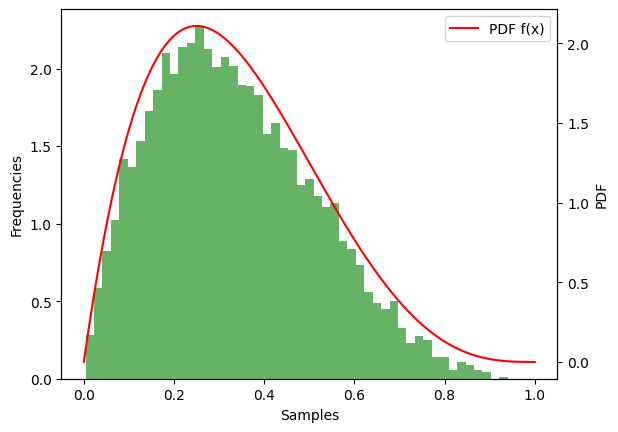

In [10]:
fig, ax1 = plt.subplots()

ax1.hist(samples, bins=50, density=True, alpha=0.6, label='Sample Histogram', color='g')
ax1.set_xlabel("Samples")
ax1.set_ylabel("Frequencies")

ax2 = ax1.twinx()
x_vals = np.arange(0, 1, 1/100000)
ax2.set_ylabel("PDF")
ax2.plot(x_vals, [f(x) for x in x_vals], color='r', label='PDF f(x)')

plt.legend()
plt.show()


## (f)

#### c=10

In [11]:
c = 10
samples, avgIter, iterations = acceptance_rejection(10000,c)

In [12]:
print("For c=10 Average number of iterations required :", avgIter)

sample_mean = np.mean(samples)

expected_mean = 0
v = np.arange(0,1,0.0001)
for i in v:
    expected_mean+=i*f(i)/10000
    
print("For c=10, Sample mean :", sample_mean, "Expected mean :", expected_mean)

count_range = 0
for i in samples:
    if(i>=0.25 and i<=0.75):
        count_range+=1
approx_prob = count_range / 10000
# exact_prob = np.sum(np.array([f(x) for x in samples if 0.25 <= x <= 0.75])) / np.sum(np.array([f(x) for x in samples]))
exxact_prob = 0.6171875

print("For c=10, Approx prob :", approx_prob)
# print("Exact prob from samples =", exact_prob)
print("For c=10 Exact prob from PDF :", exxact_prob)

avg_iter_all = np.mean(iterations)
print("For c=10 Average for each sample :", avg_iter_all)
print("Value from (a) =", avgIter)

For c=10 Average number of iterations required : 10.0441
For c=10, Sample mean : 0.33589660065993665 Expected mean : 0.3333333333333325
For c=10, Approx prob : 0.6254
For c=10 Exact prob from PDF : 0.6171875
For c=10 Average for each sample : 10.0441
Value from (a) = 10.0441


#### c=30

In [13]:
c = 30
samples, avgIter, iterations = acceptance_rejection(10000,c)

print("For c=30 Average number of iterations required :", avgIter)

sample_mean = np.mean(samples)

expected_mean = 0
v = np.arange(0,1,0.0001)
for i in v:
    expected_mean+=i*f(i)/10000
    
print("For c=30, Sample mean :", sample_mean, "Expected mean :", expected_mean)

count_range = 0
for i in samples:
    if(i>=0.25 and i<=0.75):
        count_range+=1
approx_prob = count_range / 10000
exxact_prob = 0.6171875

print("For c=30, Approx prob :", approx_prob)
print("For c=30 Exact prob from PDF :", exxact_prob)

avg_iter_all = np.mean(iterations)
print("For c=30 Average for each sample :", avg_iter_all)
print("Value from (a) =", avgIter)

For c=30 Average number of iterations required : 30.3009
For c=30, Sample mean : 0.3330351649805903 Expected mean : 0.3333333333333325
For c=30, Approx prob : 0.6237
For c=30 Exact prob from PDF : 0.6171875
For c=30 Average for each sample : 30.3009
Value from (a) = 30.3009


---

# Part (II)

### Taking ɑ = 2
f(x) = (e/(e-1))xe^(-x)

In [14]:
e = np.exp(1)

def f(x):
    return (e * x * np.exp(-x))/(2*(e-1))

def g(x):
    return 1

In [15]:
xi = np.arange(0,1,0.001)
c = -1
for i in xi:
    c = max(c, f(i))

In [16]:
def acceptance_rejection(N,c):
    samples = []
    iterations = []
    k = 0
    totalCount=0
    for i in range(N):
        currCount=0
        while True:
            x = rng[k]
            y = rng[k+1]
            k+=2
            totalCount+=1
            currCount+=1
            if y <= f(x) / (c * g(x)):
                samples.append(x)
                iterations.append(currCount)
                break

    return samples, totalCount/N, iterations

In [17]:
samples, avg_itr, iterations = acceptance_rejection(10000, c)

In [19]:
print(np.mean(samples))

0.6067682395808399


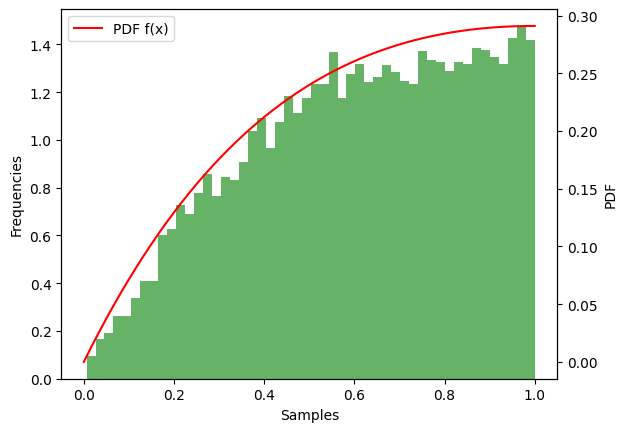

In [18]:
fig, ax1 = plt.subplots()

ax1.hist(samples, bins=50, density=True, alpha=0.6, label='Sample Histogram', color='g')
ax1.set_xlabel("Samples")
ax1.set_ylabel("Frequencies")

ax2 = ax1.twinx()
x_vals = np.arange(0, 1, 1/100000)
ax2.set_ylabel("PDF")
ax2.plot(x_vals, [f(x) for x in x_vals], color='r', label='PDF f(x)')

plt.legend()
plt.show()